Titanic_Dataset Data Science Project

#1 Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#2 Load the Dataset

In [7]:
df = pd.read_csv('Titanic.csv')
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


#3 Inspect the data

In [9]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [11]:
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


#4 Data Cleaning

In [12]:
df.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [14]:
df['age'].fillna(df['age'].median(), inplace=True)

In [15]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [16]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [17]:
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [18]:
df.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

#5 Exploratory Data Analysis (EDA)

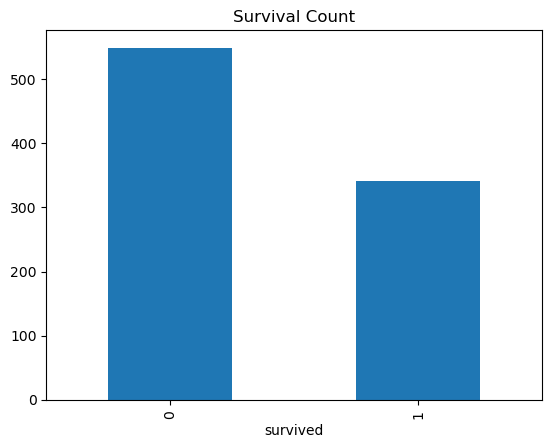

In [14]:
#Univariate 
#Survival Rate
df['survived'].value_counts().plot(kind='bar')
plt.title('Survival Count')
plt.show()

C:\Users\lakshay pandey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


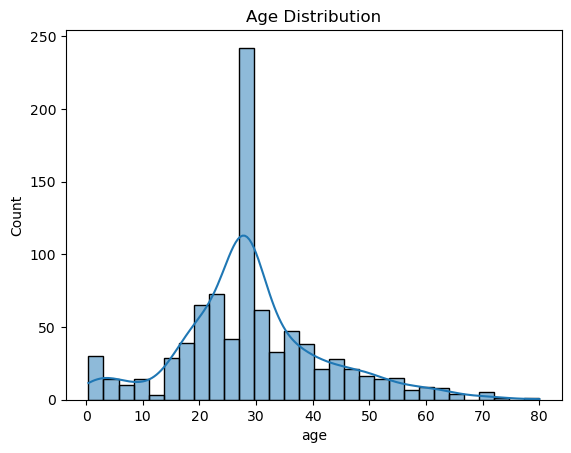

In [21]:
#Univariate 
#Age Distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

The number of males who survived is: 109
The number of females who survived is: 233


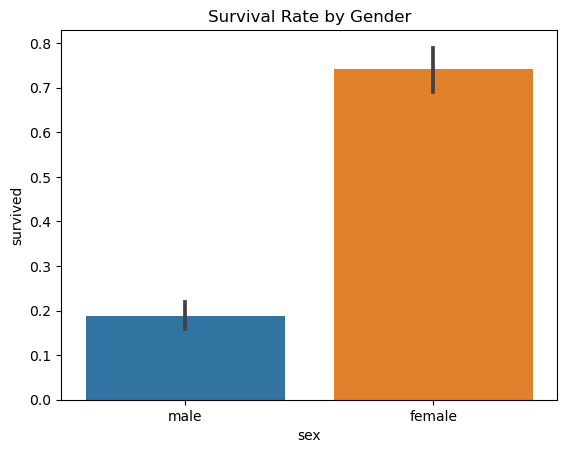

In [12]:
#Bivariate
#SurvivaL Rate by Gender

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Titanic.csv')

survived_males = df[(df['sex'] == 'male') & (df['survived'] == 1)]
num_survived_males = survived_males.shape[0]
print(f'The number of males who survived is: {num_survived_males}')

survived_females = df[(df['sex'] == 'female') & (df['survived'] == 1)]
num_survived_females = survived_females.shape[0]
print(f'The number of females who survived is: {num_survived_females}')

sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

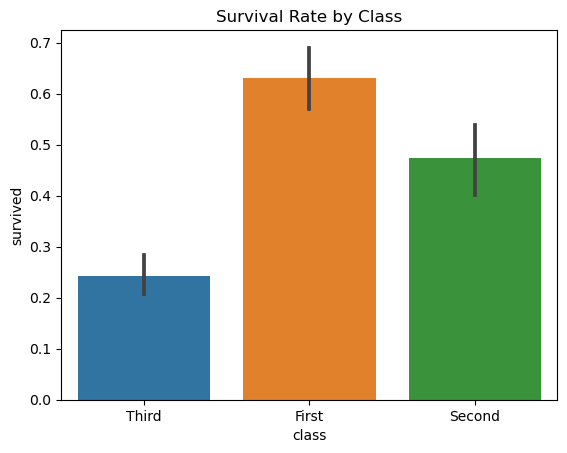

In [25]:
#Bivariate
#SurvivaL Rate by Class
sns.barplot(x='class', y='survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

C:\Users\lakshay pandey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


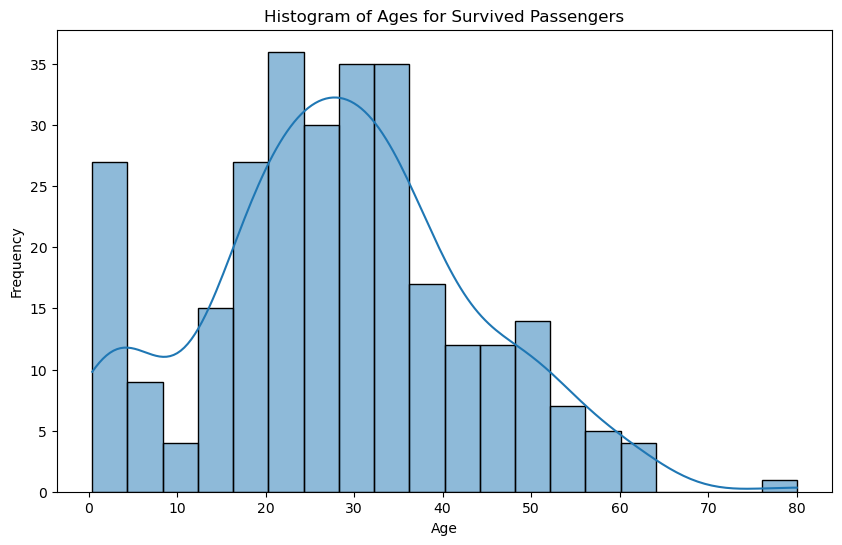

In [16]:
#Survived Age Distribution
survived_df = df[df['survived'] == 1]
plt.figure(figsize=(10, 6))
sns.histplot(data=survived_df, x='age', bins=20, kde=True)
plt.title('Histogram of Ages for Survived Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()